In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df["Gender"].replace(["Male","Female"],[0,1],inplace=True)
X= df.iloc[:, [3,4]].values # Choosing annual income and spending score
#Clustering will be done based on annual income and spending score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Dataset analysis
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


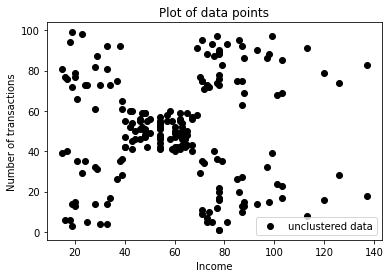

In [ ]:
#Scatter plot of dataset before clustering
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

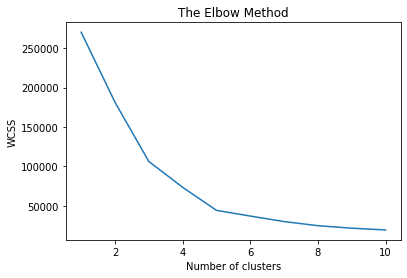

In [ ]:
#This is a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. We use this method to calculate the optimum value of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#optimum value is between 4-6. we choose 5 as it is the breaking point

Clusters for k=5
[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
Cluster center for k=5
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


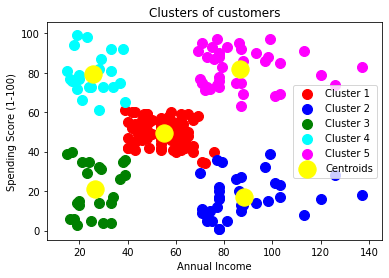

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

print("Clusters for k=5")
print(y_kmeans)
    
print("Cluster center for k=5")
print(kmeans.cluster_centers_)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#What the output means-
# There are five categories of clusters which are :
# Customers with low income but a High number of transactions (For these type may be the company can recommend products with low price) — Red cluster
# Customers with low income and a low number of transactions (Maybe these type of customers are too busy saving their money) — Cyan Cluster
# Customers with medium income and a medium number of transactions — Green Cluster
# Customers with High income and a low number of transactions — Magenta Cluster
# Customers with High income and a High number of transactions — Blue cluster.

In [ ]:
# X= df.iloc[:, [2,3,4]].values # Choosing annual income and spending score
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()
# for i in range(2,7):
#     kmeans = KMeans(n_clusters=i)
#     y_kmeans = kmeans.fit_predict(X)
#     print("Clusters for k=",i)
#     print(y_kmeans)
    
#     print("Cluster center for k=",i)
#     print(kmeans.cluster_centers_)
    
# # plt.scatter(X[:,1], X[:,2], c=KMeans(n_clusters=3).fit_predict(X),cmap="rainbow")
# # plt.scatter(X[:,0], X[:,1], c=KMeans(n_clusters=4).fit_predict(X),cmap="rainbow")
# plt.scatter(X[:,1], X[:,2], c=KMeans(n_clusters=5).fit_predict(X),cmap="rainbow")